# Assignment 1 - Statistical learning and deep learning
- name : 趙敏妏
- student ID : R09323025

## Question 1
### Q1-1. Create your myknn_regressor based on the skeleton.

In [12]:
import pickle
from sklearn import preprocessing
import numpy as np

class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR]."""
        self.n_neighbors = n_neighbors
        self.mean_type = mean_type

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        return self

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
        if self.n_neighbors < 10 or self.mean_type == 'equal_weight':
            distances = [np.linalg.norm(xtest - self.x_train, axis = 0) for xtest in x_test]
            distance_sort = [np.argsort(dist)[0: self.n_neighbors] for dist in distances]
            target = [self.y_train[dist_s] for dist_s in distance_sort]
            res = [np.average(i) for i in target]
            return res
        else:
            upper_quartile = np.percentile(self.x_train, 75, axis = 0)
            lower_quartile = np.percentile(self.x_train, 25, axis = 0)
            IQR = (upper_quartile - lower_quartile) * 1.5
            quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
            shape = self.x_train.shape
            for x in range(shape[1]):
                for i in range(shape[0]):
                    if (self.x_train[i,x] < quartileSet[0][x]) | (self.x_train[i,x] > quartileSet[1][x]):
                        self.x_train[i,x] = np.mean(self.x_train[:, x])
            else:
                self.x_train[i,x] = self.x_train[i,x]
            distances = [np.linalg.norm(xtest - self.x_train, axis = 0) for xtest in x_test]
            distance_sort = [np.argsort(dist)[0: self.n_neighbors] for dist in distances]
            target = [self.y_train[dist_s] for dist_s in distance_sort]
            res = [np.average(i) for i in target]
            return res
            
            

# remove_outliners, if K >= 10
# equal_weight, if K < 10 or user specify this model 
# if self.mean_type == 'equal_weight' or self.n_neighbor < 10:

### Q1-2. Load data from msd_data1.pickle. You should standardize all feature values to have a zero mean and unit variance before training a KNN model.  Make predictions using $k=20$ and "equal_weight" $f$. List the RMSE and the first 20 predictions in the test data. 

In [13]:
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [14]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
# list the RMSE and the first 20 prediction in the test data
print('RMSE:', np.sqrt(np.square(np.subtract(Y_test, ypred)).mean()))
print('first 20 prediction:', ypred[0:20])

RMSE: 11.150228734574613
first 20 prediction: [2000.95, 1999.95, 2001.85, 2001.55, 1995.8, 1998.0, 2001.9, 1997.8, 1995.2, 2000.35, 1998.2, 2000.9, 2002.0, 2001.1, 1997.95, 2000.9, 1997.65, 2001.45, 1998.35, 2000.15]


### Q1-3. Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance.  Make predictions using $k=20$ and "remove_outier" $f$. List the RMSE and the first 20 predictions in the testing data. 

In [15]:
myknn = myknn_regressor(20, "remove_outlier")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)
print('RMSE:', np.sqrt(np.square(np.subtract(Y_test, ypred)).mean()))
print('first 20 prediction:', ypred[0:20])

RMSE: 11.117870112271206
first 20 prediction: [1998.65, 2001.25, 2002.4, 1999.65, 2001.15, 1999.1, 2001.25, 1999.85, 1998.05, 1998.15, 1998.45, 2000.9, 2000.3, 2000.85, 1999.5, 2001.6, 1996.55, 2002.35, 1999.1, 1997.4]


## Question 2
(20%) Hyper-parameter tuning is an important skill required in many model training tasks. We are going to consider three settings in this question. Use the KNN regressor from sklearn.neighbors.KNeighborsRegressor for the first two settings, and your myknn_regressor for the third setting. 

For each setting, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using $k=1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200$. In the first case, all feature values are standardized to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case uses standardized features and adopted myknn_regressor with "remove_outlier" $f$ to make predictions. 

For each setting, plot a curve that shows the relations between $k$ (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure to visually inspect their dynamics. Discuss your observations. 

### Q2-1. first case : standardized to unit

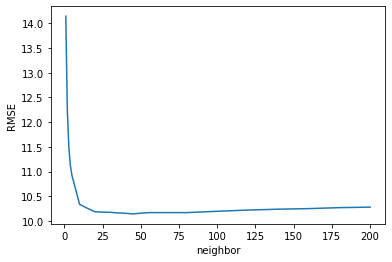

In [16]:
from sklearn.neighbors import KNeighborsRegressor
grid_parameter = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]
empty1 = np.zeros([2, len(grid_parameter)])
p = 0
for neighbor in grid_parameter:
    md = KNeighborsRegressor(n_neighbors = neighbor, p = 2, algorithm = 'brute')
    md.fit(X_train,Y_train)
    ypred = md.predict(X_test)
    rmse = np.sqrt(np.square(np.subtract(Y_test, ypred)).mean())
    empty1[0, p] = neighbor
    empty1[1, p] = rmse
    p += 1

from matplotlib import pyplot as plt 
plt.xlabel('neighbor') 
plt.ylabel('RMSE') 
plt.plot(empty1[0, :],empty1[1, :]) 
plt.show()

### Q2-2. second case : do not standadized

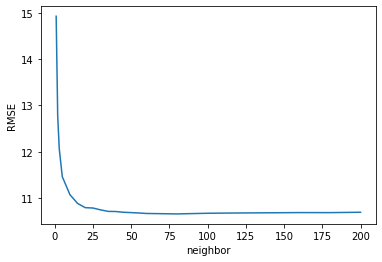

In [17]:
X_train_ord = msd_data['X_train']
Y_train_ord = msd_data['Y_train']
X_test_ord = msd_data['X_test']
Y_test_ord = msd_data['Y_test']
empty2 = np.zeros([2, len(grid_parameter)])
p = 0
for neighbor in grid_parameter:
    md = KNeighborsRegressor(n_neighbors = neighbor, p = 2, algorithm = 'brute')
    md.fit(X_train_ord,Y_train_ord)
    ypred = md.predict(X_test_ord)
    rmse = np.sqrt(np.square(np.subtract(Y_test_ord, ypred)).mean())
    empty2[0, p] = neighbor
    empty2[1, p] = rmse
    p += 1


plt.xlabel('neighbor') 
plt.ylabel('RMSE') 
plt.plot(empty2[0, :],empty2[1, :]) 
plt.show()

### Q2-3. third case : standardized and remove_outlier

In [19]:
empty3 = np.zeros([2, len(grid_parameter)])
p = 0
for neighbor in grid_parameter:
    myknn = myknn_regressor(neighbor, "remove_outlier")
    myknn.fit(X_train, Y_train)
    ypred = myknn.predict(X_test)
    rmse = np.sqrt(np.square(np.subtract(Y_test, ypred)).mean())
    empty3[0, p] = neighbor
    empty3[1, p] = rmse
    p += 1

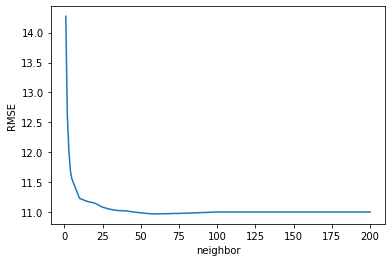

In [20]:
plt.xlabel('neighbor') 
plt.ylabel('RMSE') 
plt.plot(empty3[0, :],empty3[1, :]) 
plt.show()

## Question 3
### Q3-1. 基於本題給的L，推導新的Coordinate Descent with Soft Thresholding公式


$$\frac{\partial L^{'}}{\partial w_j} = \frac{1}{n}\sum^{n}_{i=1}(y_i - w^T x_i - w_0)(-x_j)+\lambda sgn(w_j)$$
where
$$w^T x_i = w^T_1 x_1 + w^T_2 x_2 + \ldots + w^T_j x_j + \ldots + w^T_n x_n \\ 
= w^T_{j}x_{-j} + w_j x_j$$

using the new notation,
$$\frac{\partial L^{'}}{\partial w_j} = \frac{1}{n}\sum^{n}_{i=1}(y_i - w^T x_i - w_0)(-x_j)+\lambda sgn(w_j) \\
=\frac{1}{n}\sum^{n}_{i=1}(y_i - w^T_{j}x_{-j} - w_j x_j)(-x_j) + \lambda sgn(w_j)\\
= \frac{1}{n}\sum^{n}_{i=1}(y_i - w^T_{j}x_{-j} )(-x_j) +\frac{1}{n}\sum^{n}_{i=1} w_j x_j^2 +\lambda sgn(w_j)$$
where 
$$sgn(w_j) = 1,\, if \, w_j >0, \\
sgn(w_j) = -1, \, if \, w_j <0, \\
sgn(w_j) = 0, \, if \, w_j = 0$$ 
<br>

$$w_j = \frac{\sum^{n}_{i=1}(y_i - w^T_{j}x_{-j} )(-x_j) - \lambda sgn(w_j)}{x^2_j}$$
Given $\tilde{w}$ , update $w_j$ by
$$w_j = \frac{\sum^{n}_{i=1}(y_i - \tilde{w}^{T}_{j}x_{-j} )(-x_j) - \lambda sgn(w_j)}{x^2_j}$$

The $w_j$ will be positive if 
$$ \frac{\sum^{n}_{i=1}(y_i - \tilde{w}^{T}_{j}x_{-j} )(-x_j) - \lambda}{x^2_j} > 0, \\
w_j = \frac{\sum^{n}_{i=1}(y_i - \tilde{w}^{T}_{j}x_{-j} )(-x_j) - \lambda}{x^2_j}$$
alternatively, $w_j$ will be negative if
$$\frac{\sum^{n}_{i=1}(y_i - \tilde{w}^{T}_{j}x_{-j} )(-x_j) + \lambda}{x^2_j} > 0, \\
w_j = \frac{\sum^{n}_{i=1}(y_i - \tilde{w}^{T}_{j}x_{-j} )(-x_j) + \lambda}{x^2_j}$$

set $w_j^* =\frac{\sum^{n}_{i=1}(y_i - \tilde{w}^{T}_{j}x_{-j} )(-x_j)}{x^2_j}$, then
$$w_j = \begin{cases}
    w^*_j - \frac{\lambda_j}{x^2_j}, if \,  w^*_j - \frac{\lambda}{x^2_j} >0, \\
    w^*_j + \frac{\lambda_j}{x^2_j}, if \,  w^*_j + \frac{\lambda}{x^2_j} <0, \\
    0, otherwise
\end{cases}
$$

### Q3-2. 使用給定個骨架建構你的mylasso。

In [ ]:
import numpy as np

class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter = 1000, tol = 1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu
        
    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        self.x_train = x_train
        self.y_train = y_train
        return self

    def predict(self, x_test):
        """Make prediction using trained model"""

        ### Add your code here ###

### Q3-4. 使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。


In [ ]:
import pickle
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
#standardize feature values
X_train_sd = xscaler.transform(msd_data['X_train'])
X_test_sd = xscaler.transform(msd_data['X_test'])

#outcome values
Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [ ]:
mlo = mylasso(lamcoef = 0.1)
mlo.fit(x_train, y_train)
ypred = mlo.predict(x_test)

### Q3-5. 使用下面的$\lambda$訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。記錄每一個$\lambda$的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、Test RMSE。將所有的結果列表、畫折線圖、並寫下你對結果的觀察。


In [ ]:
lambda_parameter = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]